# Load dataset

In [1]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data_path = "test_sine.pkl"
with open(data_path, 'rb') as f:
    data = pickle.load(f)

# Auxiliary Functions

In [2]:
from torch.autograd import Variable
def to_variable(X, cuda=True):
    if isinstance(X, (tuple, list)):
        return tuple(to_variable(x) for x in X)
    else:
        X = Variable(X)
        if cuda:
            return X.cuda().requires_grad_()
        return X.requires_grad_()

# Load model

In [3]:
import simple # Replace with the actual name of your model class

# Load the model
model_props = {"a": 2, "b": 32}
simple.configure(model_props)  # Replace with the actual name of your model class
model = simple.model

In [4]:
# Load the state dict
state_dict_path = "s3.pth"
checkpoint = torch.load(state_dict_path)

# Load the model's state dict
model.load_state_dict(checkpoint)
model.eval()

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=2, bias=True)
)

# Run Predictions

In [5]:
start = to_variable(torch.tensor(np.array(data.iloc[1:2])), cuda=False)
path = []
INDEX = 0
for i in range(1, 10000):
    k1 = model(start)
    k1.detach()
    start = k1
    start.detach()
    print(start[0][INDEX].item())
    path.append(start[0][INDEX].item())

0.05936235682463761
-0.24602812952996003
-0.5295415193332476
-0.7664674557345319
-0.935778078265536
-1.0177494849983661
-1.0064303820488492
-0.9094689168792196
-0.7387888062156239
-0.5031363535418386
-0.22323953147065928
0.07375409663635249
0.36158020945116387
0.6127717157863983
0.8069758223041443
0.9228955149429203
0.9514494915257512
0.8901434040376645
0.7448273107415988
0.5291378522754439
0.26321874552246116
-0.030403358969050692
-0.32415898840327884
-0.5899279143216412
-0.8032462945122703
-0.9479154897115915
-1.0058031968753258
-0.9733971799543469
-0.8564448926465619
-0.6669225944231849
-0.41871203230336784
-0.1337422274269535
0.15980671428235962
0.43730329990036243
0.6702440884217892
0.8393958648949333
0.9278131072679421
0.9284572624748774
0.8414250337977441
0.6749502428073441
0.44462513671711856
0.1723830685342747
-0.11269240759082597
-0.3881082282064364
-0.6318495368370395
-0.8188960853110114
-0.9350409067510144
-0.9686762305985648
-0.9154496370895033
-0.783899702738162
-0.583683

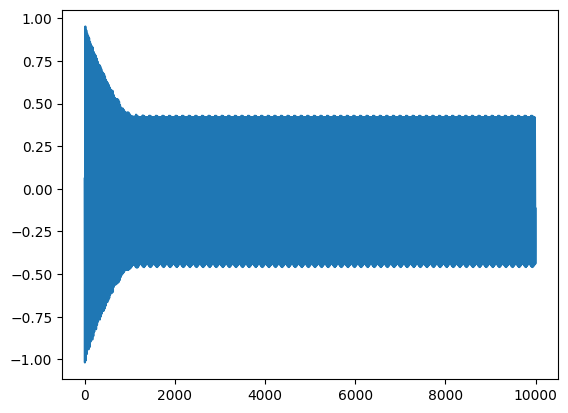

In [8]:
plt.plot(path[0:10000])

In [7]:
y1 = path[:2000]
y2 = pit300

plt.figure(figsize=(12, 4))

# Plotting the first set of points
plt.subplot(1, 2, 1)
plt.plot(y1, label='Model predictions')
plt.title('Model Predictions (Skip 10, stable)')

# Plotting the second set of points
plt.subplot(1, 2, 2)
plt.plot(y2[:20000], label='PIT300')
plt.title('PIT300 - Training Set')

# # Plotting both lines in the same plot
# plt.subplot(1, 2, 1)
# plt.plot(y1, label='Line 1')
# plt.plot(y2, label='Line 2')
# plt.legend()
# plt.title('Both Lines')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


NameError: name 'pit300' is not defined

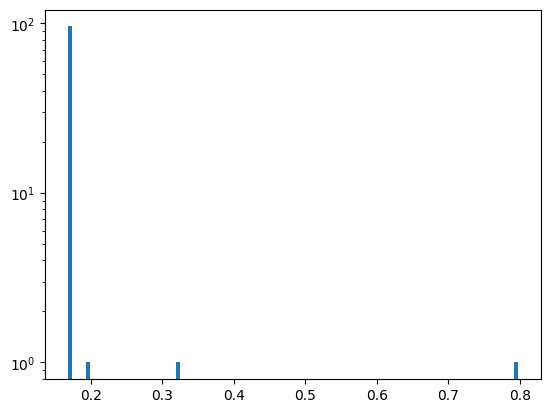

In [ ]:
y1 = path
plt.hist(y1, bins=100, log=True)
plt.show()